<a href="https://colab.research.google.com/github/firasouerghi/Face-recognition-using-KNN/blob/master/Face_Recognition_Signal_Processing_for_Data_Science_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd 
import numpy as np
import seaborn as sns 
from sklearn.model_selection import train_test_split
sns.set()
import matplotlib.pyplot as plt 
%matplotlib inline 

In [0]:
data=pd.read_csv("/content/face_data.csv")

In [0]:
print(data.head())
Target=data['name']
features=data.drop('name',axis=1)
#print(Target)


   Unnamed: 0   0   1   2    3    4  ...  9994  9995  9996   9997   9998   9999
2           2  75  79  89  100  103  ...  75.0  72.0  86.0  118.0  142.0  152.0

[1 rows x 10001 columns]


2    firas
Name: name, dtype: object
100    Fedi
Name: name, dtype: object


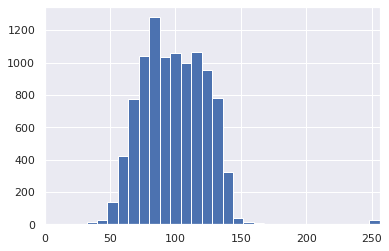

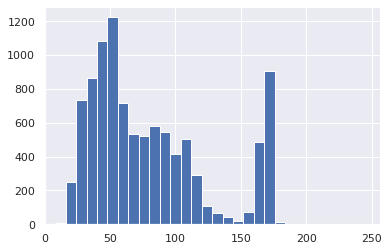

In [0]:
#Draw the histogram
M=np.asarray(features.iloc[[2]])
print(Target.iloc[[2]])
N=np.asarray(features.iloc[[100]])
print(Target.iloc[[100]])
fig, ax = plt.subplots(1, 1)
ax.hist(M.ravel(), bins=32, range=[0, 256])
ax.set_xlim(0, 256);
fig, ax = plt.subplots(1, 1)
ax.hist(N.ravel(), bins=32, range=[0, 256])
ax.set_xlim(0, 256);


In [0]:
X_train, X_test, y_train, y_test = train_test_split(features, Target, test_size=0.3, random_state=101)

In [0]:
from sklearn.neighbors import KNeighborsClassifier 

In [0]:
knn=KNeighborsClassifier(n_neighbors=5)

In [0]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
pred=knn.predict(X_test)

In [0]:
from sklearn.metrics import confusion_matrix, classification_report

In [0]:
print(confusion_matrix(y_test,pred))

[[33  0  0  0  1  0  0  0  1  0  0  0]
 [ 0 42  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 28  0  1  0  1  0  0  0  0  0]
 [ 0  0  0 29  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 34  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 33  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 31  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 27  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 31  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 24  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 30]]


In [0]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

        Fedi       1.00      0.94      0.97        35
       firas       1.00      1.00      1.00        42
       ghada       1.00      0.93      0.97        30
     haithem       1.00      1.00      1.00        29
       louay       0.94      1.00      0.97        34
      maryem       1.00      1.00      1.00        33
      mayssa       0.97      1.00      0.98        31
       mehdi       1.00      1.00      1.00        27
     mohamed       0.97      1.00      0.98        31
        olfa       1.00      1.00      1.00        24
       sejda       1.00      1.00      1.00         2
       siwar       1.00      1.00      1.00        30

    accuracy                           0.99       348
   macro avg       0.99      0.99      0.99       348
weighted avg       0.99      0.99      0.99       348



In [0]:
erro_rate=[]
for i in range (1,70):
  knn=KNeighborsClassifier(n_neighbors=i,weights='distance',algorithm='ball_tree')
  knn.fit(X_train,y_train)
  pred_i=knn.predict(X_test)
  erro_rate.append(np.mean(pred_i != y_test ))

Text(0.5, 0, 'k')

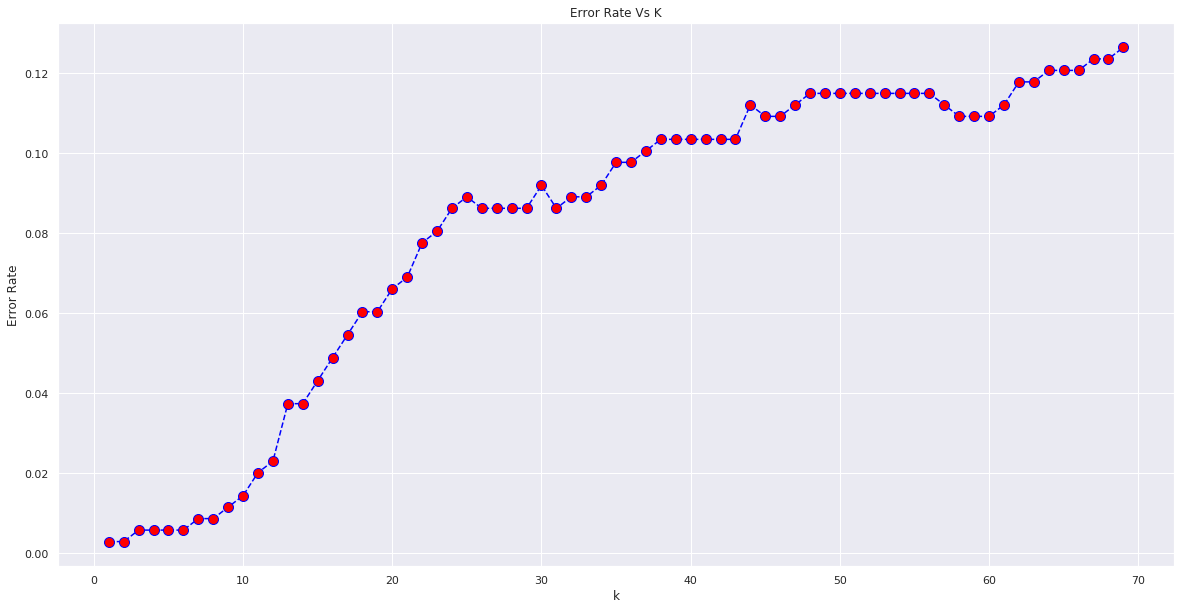

In [0]:
plt.figure(figsize=(20,10))
plt.plot(range(1,70),erro_rate,color='blue',linestyle='--',marker='o',markerfacecolor='red',markersize=10)
plt.title("Error Rate Vs K")
plt.ylabel("Error Rate")
plt.xlabel('k')